# 准备练习

## 导入数据集和库

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

X = load_iris().data
label = load_iris().target
names = load_iris().target_names
data = pd.DataFrame(X, columns=['玫瑰花', '霸王花', '郁金香', '康乃馨'])
data

,玫瑰花,霸王花,郁金香,康乃馨
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 归一化数据

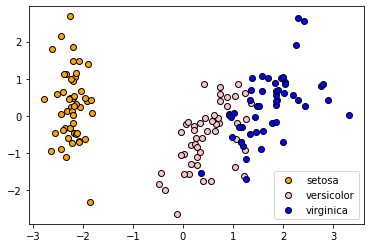

In [2]:
newX = scale(X)
pca = PCA(n_components=2).fit(newX)
X_dec = pca.transform(newX)
colors = ['orange', 'pink', 'blue', 'cyan']
for i in range(3):
    plt.scatter(X_dec[label == i, 0],
                X_dec[label == i, 1],
                color=colors[i],
                marker='o',
                edgecolor='k',
                label=names[i])
plt.legend(loc=0)
plt.show()

## 方差解释

重新计算降纬后的特征方差

In [3]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

方差解释

In [4]:
pca.explained_variance_ratio_  #可见第一列降维数据最为代表性

array([0.72962445, 0.22850762])

In [5]:
1 - pca.explained_variance_ratio_.sum()  #损失信息量

0.04186792799998362

## 确定特征个数，作出如下曲线

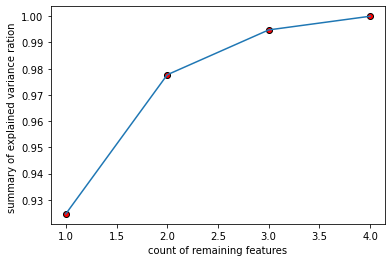

In [6]:
ratio = []
for i in range(1, min(X.shape) + 1):
    pca = PCA(n_components=i).fit(X)
    x = pca.explained_variance_ratio_.sum()
    ratio.append(x)
plt.plot(range(1, min(X.shape) + 1), ratio)
plt.scatter(range(1,
                  min(X.shape) + 1),
            ratio,
            marker='o',
            edgecolor='k',
            color='red')
plt.xlabel('count of remaining features')
plt.ylabel('summary of explained variance ration ')
plt.show()

In [7]:
# 测试机集
data.to_excel(r'./鸢尾花数据测试集.xlsx')

x=np.random.uniform(0,1,(1,4))

np.cumsum(x,axis=1)

用于计算逐步累计值

# 完整代码

In [8]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号
fpath = r'./鸢尾花数据测试集.xlsx'
data = pd.read_excel(fpath, usecols=[1, 2, 3, 4])
data

,玫瑰花,霸王花,郁金香,康乃馨
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


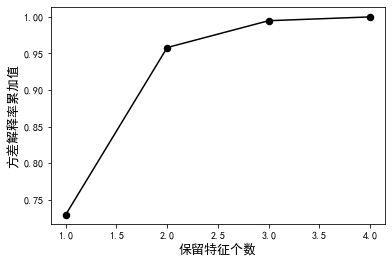

In [9]:
X = scale(data)  #标准化数据
pca = PCA().fit(X)
ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, min(ratio.shape) + 1), ratio, color='k')
plt.scatter(range(1,
                  min(ratio.shape) + 1),
            ratio,
            marker='o',
            edgecolor='k',
            color='k',
            linewidth=1.5)
plt.xlabel('保留特征个数', fontsize=13)
plt.ylabel('方差解释率累加值', fontsize=13)
plt.show()

In [10]:
# 降维数据写入，以留作接下来的数据处理分析
pd.DataFrame(pca.transform(X)).to_excel(r'./PCA of data.xlsx')

从上图可以看出保留两个特征时，曲线变化平缓，说明去前两个特征比较好